# Découverte des signaux audio

## Un peu de théorie

Un signal audio est l'enregistrement de la fluctuation de pression de l'air (en Pascal) autour d'une pression d'équilibre. Un bruit ou un son peut ainsi être représenté sous la forme d'une *onde*, qui se propage dans l'espace au cours du temps.

Les ondes acoustiques ont donc besoin de 3 éléments pour pouvoir être générées puis perçues :
- un émetteur : dans un nombre important de cas il s'agit d'un élément mécanique qui vibre (vos cordes vocales)
- un milieu de propagation : sans air ou eau, pas de son (Star Wars est un fake total)
- un récepteur : une membrane qui va vibrer lorsqu'elle va être frappée par l'onde qui lui arrive dessus (votre tympan)

Cette explication très rapide et imagée de l'acoustique n'a pas pour vocation d'être exacte, elle vous permet seulement de comprendre un peu mieux les signaux que vous aller utiliser, et surtout d'où ils viennent.

D'un point de vue du traitement du signal, tout le système de génération du signal que l'on reçoit n'est pas très important. Ce qui compte c'est que c'est une grandeur scalaire qui est enregistrée au cours du temps (en Pascal) par un microphone.

On se retrouve donc avec une courbe au cours du temps, qui varie en fonction de l'intensité du son qui a été reçu.

Cependant une notion très importante du traitement du signal à comprendre concerne le fait que ce signal, bien que continu dans la vie réelle, est *numérisé*, et donc discrétisé dès qu'il est passé sur notre ordinateur. On se retrouve donc non plus avec un signal continu (dit *analogique*), mais avecun signal discret (dit *numérique*), et la bonne description de ce signal dépend de la fréquence à laquelle on enregistre deux points consécutifs du signal ce qui définit notre **fréquence d'échantilonnage**. Plus la fréquence d'échantillonnage est importante, mieux le signal est décrit, mais plus il prend de place en mémoire.

A travers ce Notebook, vous allez découvrir les bases du traitement de signaux audio, et notamment comment on peut les créer et les écouter, mais aussi quels sont les deux principaux sons que l'on aime souvent manipuler en traitement du signal : le *sinus* et le *bruit blanc*. 
Il a pour vocation de vous faire comprendre comment on manipule ces signaux, et vous permettra de tester une première classification entre ces deux types de signaux facile à différencier.

## En pratique !

In [6]:
# Import des packages nécessaires
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import pickle
from math import inf

In [7]:
%matplotlib notebook

In [8]:
# Paramètres d'un signal audio
duree = 2 # Durée en secondes
fe = 44100 # Fréquence d'échatillonnage en Hertz, 44100 est très courant en audio
amp = 0.1 # Amplitude en Pascal

In [9]:
# Création d'un sinus
f0 = 1000 # Fréquence du sinus
t = np.arange(0, duree, 1/fe) # Création du vecteur temporel (1 point pour chaque échantillon)
sinus = amp*np.sin(2*np.pi*f0*t)

sinus


array([ 0.        ,  0.01419943,  0.02811111, ..., -0.04145312,
       -0.02811111, -0.01419943])

<IPython.core.display.Javascript object>


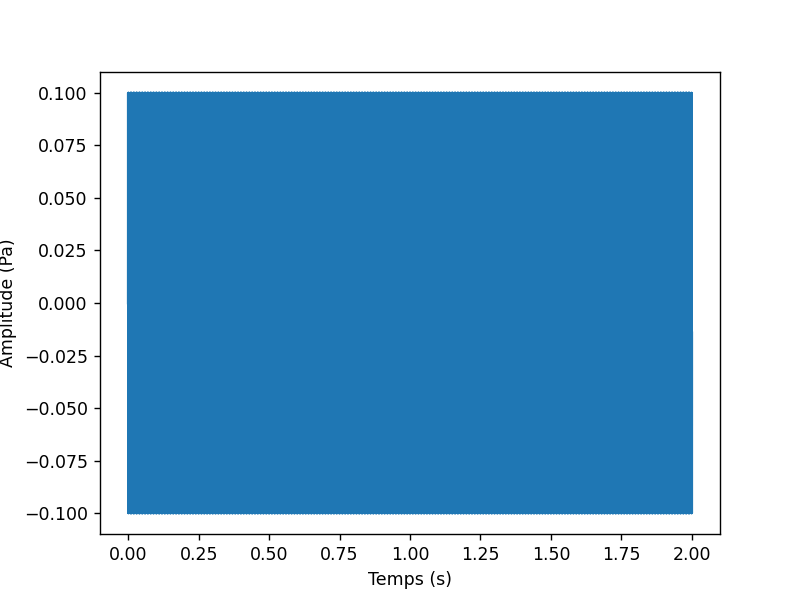

Text(0, 0.5, 'Amplitude (Pa)')

In [10]:
# Représentation du sinus
plt.figure()
plt.plot(t, sinus)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (Pa)")

On représente un sinus au cours du temps, avec le temps choisi comme durée du signal et l'amplitude voulue.
Que se passe-t-il si on l'écoute ?

In [11]:
# Puis on l'écoute
sd.play(sinus, fe)

# On peut éventuellement le sauvegarder sur disque
fichier_sinus = open('sinus', 'wb')
pickle.dump(sinus, fichier_sinus)

fichier_sinus.close()

#### Exercices

Essayez de jouer avec les paramètres du signal pour voir à partir de quel moment il y a des choses qui ne se passent pas bien !

### Tests

#### Test 1

In [12]:
# Paramètres d'un signal audio
duree = 2 # Durée en secondes
fe = 100000 # Fréquence d'échatillonnage en Hertz, 44100 est très courant en audio
amp = 0.1 # Amplitude en Pascal

# Création d'un sinus
f0 = 1000 # Fréquence du sinus
t = np.arange(0, duree, 1/fe) # Création du vecteur temporel (1 point pour chaque échantillon)
sinus = amp*np.sin(1*np.pi*f0*t)

#notes : quand on passe la fréquence du sinus (fe) à 10 au lieu de 1000, cela crée des périodes, 
#quand on le passe à 100; on obtient le même bruit en plus grave.

#duree : la modification de la durée n'empêche pas de garder un signal régulier donc un sinus. 
#La modification de la durée augmente juste le temps du signal.

#la modification de du paramètre fe, la fréquence originale entraîne forcément une modification de la régularité su dignal.
#a 1000 elle est irrégulière. A partir de 2500 la fréquence redevient régulière. 
#Quelque soit la valeur que l'on mette au dessus on reste sur un sinus. cela est probablement du au fait que nous ne percevons
#pas les modifications au delà de 20 000 Hz

#quand on modifie le chiffre de ce paramètre : sinus = amp*np.sin(1*np.pi*f0*t), cela joue sur les aigus et les graves du son.

<IPython.core.display.Javascript object>


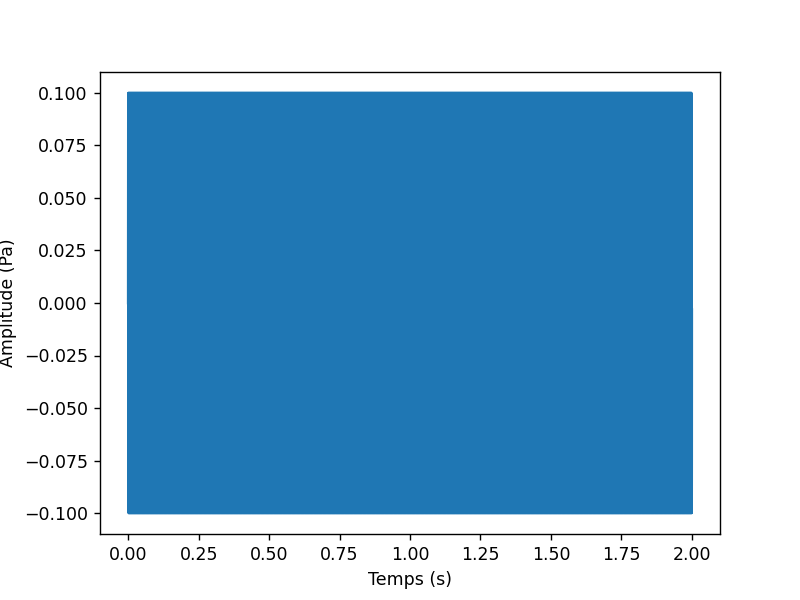

Text(0, 0.5, 'Amplitude (Pa)')

In [13]:
# Représentation du sinus
plt.figure()
plt.plot(t, sinus)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (Pa)")

In [14]:
# Puis on l'écoute
sd.play(sinus, fe)

# On peut éventuellement le sauvegarder sur disque
fichier_sinus = open('sinus', 'wb')
pickle.dump(sinus, fichier_sinus)

fichier_sinus.close()

In [15]:
# On crée ensuite un autre type de son : le bruit blanc
bb = amp*np.random.randn(duree*fe)

<IPython.core.display.Javascript object>


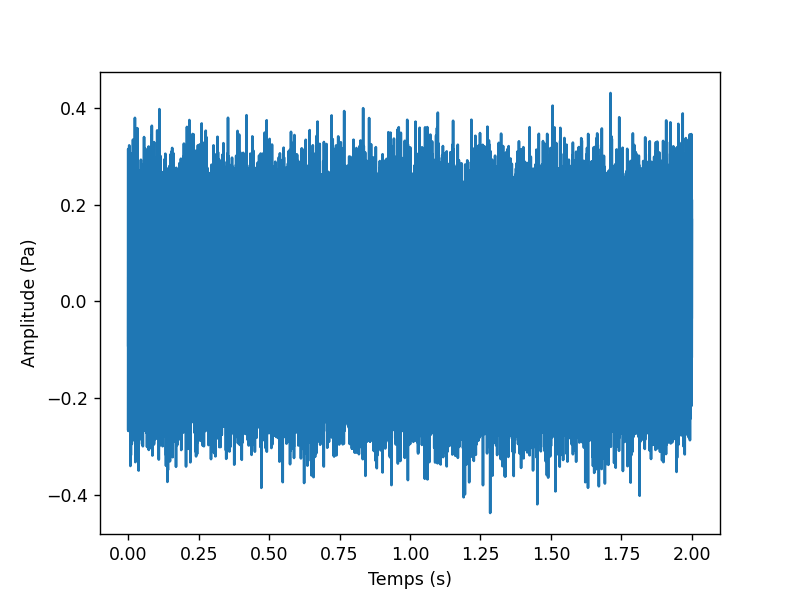

Text(0, 0.5, 'Amplitude (Pa)')

In [16]:
# On le trace pour voir à quoi il ressemble
plt.figure()
plt.plot(t, bb)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (Pa)")

A votre avis, qu'est ce que ce son peut représenter ?
Pour en avoir une idée nous allons l'écouter.

In [20]:
# Ecoute du bruit blanc
sd.play(bb, fe)

# Export sur disque
fichier_bb = open('bb', 'wb')
pickle.dump(bb, fichier_bb)

bb
# fichier_bb.close()



array([-0.09059337, -0.06893146, -0.26635287, ...,  0.0074115 ,
       -0.03446234,  0.1679719 ])

### Test 2

<IPython.core.display.Javascript object>


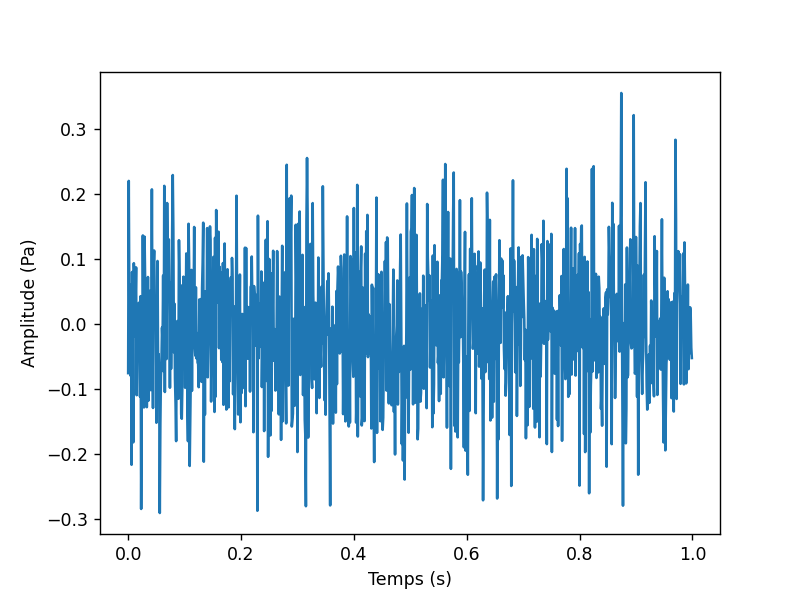

Text(0, 0.5, 'Amplitude (Pa)')

In [13]:
# Paramètres d'un signal audio
duree = 1 # Durée en secondes
fe = 1000 # Fréquence d'échatillonnage en Hertz, 44100 est très courant en audio
amp = 0.1 # Amplitude en Pascal

# Création d'un sinus
f0 = 1000 # Fréquence du sinus
t = np.arange(0, duree, 1/fe) # Création du vecteur temporel (1 point pour chaque échantillon)
sinus = amp*np.sin(1*np.pi*f0*t)

# On crée ensuite un autre type de son : le bruit blanc
bb = amp*np.random.randn(duree*fe)
min_sig(bb)
# On le trace pour voir à quoi il ressemble
plt.figure()
plt.plot(t, bb)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (Pa)")


# modification des paramiètres :
#fe : quand on réduit la fréquence, l'ambplitude diminue. a 800, l'audio ne fonctionne pas

In [19]:
print(np.min(bb))


-0.2905325861935414


In [14]:
# Ecoute du bruit blanc
sd.play(bb, fe)

#### Exercices

Expliquez la différence entre un bruit blanc et un sinus selon vous.
Regénérez des bruits blancs à partir du même code, sont-ils strictement les mêmes ? 
Si non, comment faire pour s'assurer qu'ils le soient ?

Réponse : 
Un sinus est continu, on le constate à l'écoute mais surtout au cours de la réprésentation graphique. 
Un bruit blanc comporte plusieurs fréquences. 
Ces deux signaux ont pour autant la même amplitude (0.1) et la même fréquence (44100Hz).

## Générez votre base de données

A partir des deux sons que vous avez générés, vous allez devoir créer une base de données qui permet de différencier entre les sinus et les bruits blancs. Sur quoi pouvez-vous jouer pour construire une base de données qui permet de différencier ces deux sons ?

Une fois que vous avez votre idée, construisez votre base de données !